In [335]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [336]:
df = pd.read_csv(r'C:\Users\yasmi\OneDrive\Documents\Data science courses\avocado data.csv')

In [337]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [338]:
df = df.drop(['Unnamed: 0'],axis=1)

In [339]:
df = df.rename(index=str, columns={"4046" : "Small", "4225" : "Large", "4770" : "XLarge"})

In [340]:
regions_to_remove = ['SouthCarolina',
'NorthernNewEngland',
'NewOrleansMobile',
'Plains',
'SouthCentral',
'Midsouth',
'Southeast',
'Northeast',
'GreatLakes',
'West',
'TotalUS',
'WestTexNewMexico',
'HartfordSpringfield',
'CincinnatiDayton',
'RichmondNorfolk',
'NewYork']

In [341]:
# We are removing the states to handle multicollenearity within the data set and then we need to print the count of 
# unique remaining regions. The goal for this is to focus the analysis on the specific cities instead of
# analyzing both, cities and states.

In [342]:
df = df[~df.region.isin(regions_to_remove)]
len(df.region.unique())

38

In [343]:
# Total Bags = Small Bags + Large Bags + XLarge Bags. To avoid multicollinearity, we can drop 'Total Bags'.

# Columns to drop: Total Volume, Total Bags (since it is addition of Small Bags+Large Bags + XLarge Bags)

df.drop(['Total Volume', 'Total Bags'], axis=1, inplace=True)

In [344]:
df

,Date,AveragePrice,Small,Large,XLarge,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...
18208,04-02-2018,1.32,89.59,440.31,0.00,6827.78,5.88,0.0,organic,2018,Tampa
18209,28-01-2018,1.61,156.01,859.20,0.00,5567.39,1113.29,0.0,organic,2018,Tampa
18210,21-01-2018,1.52,76.66,407.09,0.00,6375.55,11.75,0.0,organic,2018,Tampa
18211,14-01-2018,1.53,106.98,496.61,0.00,6634.45,0.00,0.0,organic,2018,Tampa


In [345]:
# Encoding for 'type' and 'region' columns

df_cat_encoded=pd.get_dummies(df[["type","region"]], drop_first = True)

In [346]:
df_numerical = df[['AveragePrice', 'Small', 'Large', 'XLarge', 'Small Bags', 'Large Bags',
       'XLarge Bags','Date']]

In [347]:
df_final = pd.concat([df_cat_encoded,df_numerical], axis=1)

In [348]:
df_final

,type_organic,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_Columbus,...,region_Syracuse,region_Tampa,AveragePrice,Small,Large,XLarge,Small Bags,Large Bags,XLarge Bags,Date
0,False,False,False,False,False,False,False,False,False,False,...,False,False,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,27-12-2015
1,False,False,False,False,False,False,False,False,False,False,...,False,False,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,20-12-2015
2,False,False,False,False,False,False,False,False,False,False,...,False,False,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,13-12-2015
3,False,False,False,False,False,False,False,False,False,False,...,False,False,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,06-12-2015
4,False,False,False,False,False,False,False,False,False,False,...,False,False,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,29-11-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18208,True,False,False,False,False,False,False,False,False,False,...,False,True,1.32,89.59,440.31,0.00,6827.78,5.88,0.0,04-02-2018
18209,True,False,False,False,False,False,False,False,False,False,...,False,True,1.61,156.01,859.20,0.00,5567.39,1113.29,0.0,28-01-2018
18210,True,False,False,False,False,False,False,False,False,False,...,False,True,1.52,76.66,407.09,0.00,6375.55,11.75,0.0,21-01-2018
18211,True,False,False,False,False,False,False,False,False,False,...,False,True,1.53,106.98,496.61,0.00,6634.45,0.00,0.0,14-01-2018


In [349]:
df = df_final[['Date','AveragePrice']]

In [350]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [351]:
df

,Date,AveragePrice
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28
...,...,...
18208,2018-02-04,1.32
18209,2018-01-28,1.61
18210,2018-01-21,1.52
18211,2018-01-14,1.53


In [352]:
df.sort_values(by=['Date'], inplace=True, ascending=True)

In [353]:
df

,Date,AveragePrice
103,2015-01-04,1.00
10893,2015-01-04,1.12
2131,2015-01-04,1.05
11101,2015-01-04,2.01
11673,2015-01-04,1.80
...,...,...
8634,2018-03-25,1.15
17997,2018-03-25,1.52
8490,2018-03-25,1.04
8610,2018-03-25,0.73


In [354]:
df['Date'] = df['Date'].dt.strftime('%Y-%d-%m')

In [355]:
max_date = pd.to_datetime(df['Date'], errors='coerce').max()

In [356]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [357]:
df.set_index('Date', inplace=True)

In [358]:
filtered_df = df[df.index <= max_date]

In [359]:
# Resampled to monthly frequency and calculate the mean
monthly_df = filtered_df.resample('M').mean()

In [360]:
monthly_df 

,AveragePrice
Date,
2015-01-31,1.280526
2015-02-28,1.490921
2015-03-31,1.277632
2015-04-30,1.355000
2015-05-31,1.417434
2015-06-30,1.361776
2015-07-31,1.376447
2015-08-31,1.337281
2015-09-30,1.444737


In [361]:
# computing the messing values in chronological order ( one after the other ) 

In [362]:
monthly_df['AveragePrice'] = monthly_df['AveragePrice'].bfill()

In [363]:
# the bfill method replaces nan values by propagating the next valid value backward 
# the ffill method replaces nan values by propagating the next valid value forward

In [364]:
# Split dataset in x and y

y = monthly_df.AveragePrice
x = monthly_df.drop(['AveragePrice'], axis = 1)

In [365]:
x

""
Date
2015-01-31
2015-02-28
2015-03-31
2015-04-30
2015-05-31
2015-06-30
2015-07-31
2015-08-31
2015-09-30


In [366]:
y

Date
2015-01-31    1.280526
2015-02-28    1.490921
2015-03-31    1.277632
2015-04-30    1.355000
2015-05-31    1.417434
2015-06-30    1.361776
2015-07-31    1.376447
2015-08-31    1.337281
2015-09-30    1.444737
2015-10-31    1.318421
2015-11-30    1.364211
2015-12-31    1.396645
2016-01-31    1.147368
2016-02-29    1.565921
2016-03-31    1.241579
2016-04-30    1.370263
2016-05-31    1.242763
2016-06-30    1.443947
2016-07-31    1.293684
2016-08-31    1.143421
2016-09-30    1.478026
2016-10-31    1.248333
2016-11-30    1.329145
2016-12-31    1.309474
2017-01-31    1.582566
2017-02-28    1.521579
2017-03-31    1.630132
2017-04-30    1.566974
2017-05-31    1.342939
2017-06-30    1.620658
2017-07-31    1.471579
2017-08-31    1.583750
2017-09-30    1.514013
2017-10-31    1.610263
2017-11-30    1.532763
2017-12-31    1.393333
2018-01-31    1.293750
2018-02-28    1.293750
2018-03-31    1.293750
2018-04-30    1.293750
2018-05-31    1.356842
2018-06-30    1.356842
2018-07-31    1.356842
2018-0

In [367]:
train_size = int(len(monthly_df) * 0.8)
train_data, test_data = monthly_df[:train_size], monthly_df[train_size:]

In [368]:
train_data.shape, test_data.shape

((37, 1), (10, 1))

In [369]:
df

,AveragePrice
Date,
2015-04-01,1.00
2015-04-01,1.12
2015-04-01,1.05
2015-04-01,2.01
2015-04-01,1.80
...,...
NaT,1.15
NaT,1.52
NaT,1.04


In [370]:
df.reset_index(inplace = True)

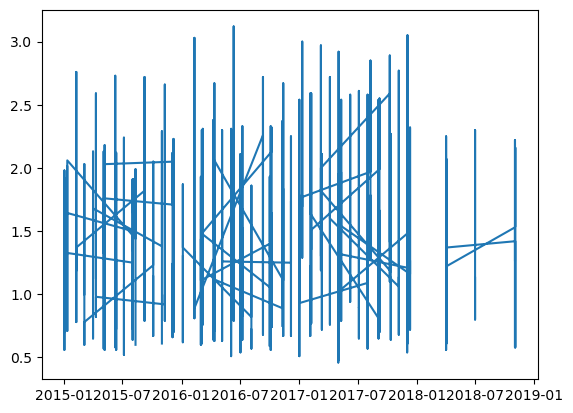

In [371]:
plt.plot(df['Date'],df['AveragePrice'])

<Axes: xlabel='Date'>

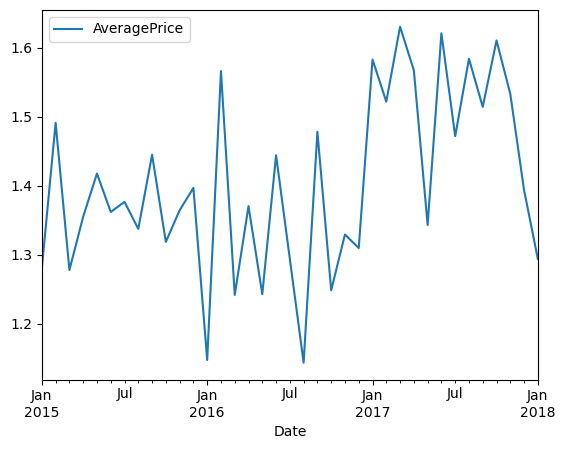

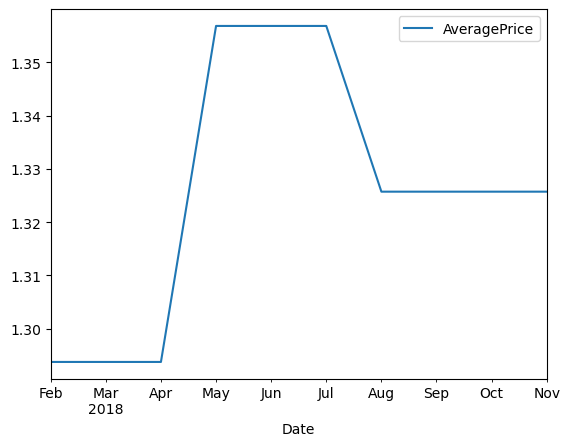

In [372]:
# Plot the train and test data sets

train_data.plot(legend=True,label='Train')
test_data.plot(legend=True,label='Test')

In [373]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['AveragePrice'], model='additive', period=12)

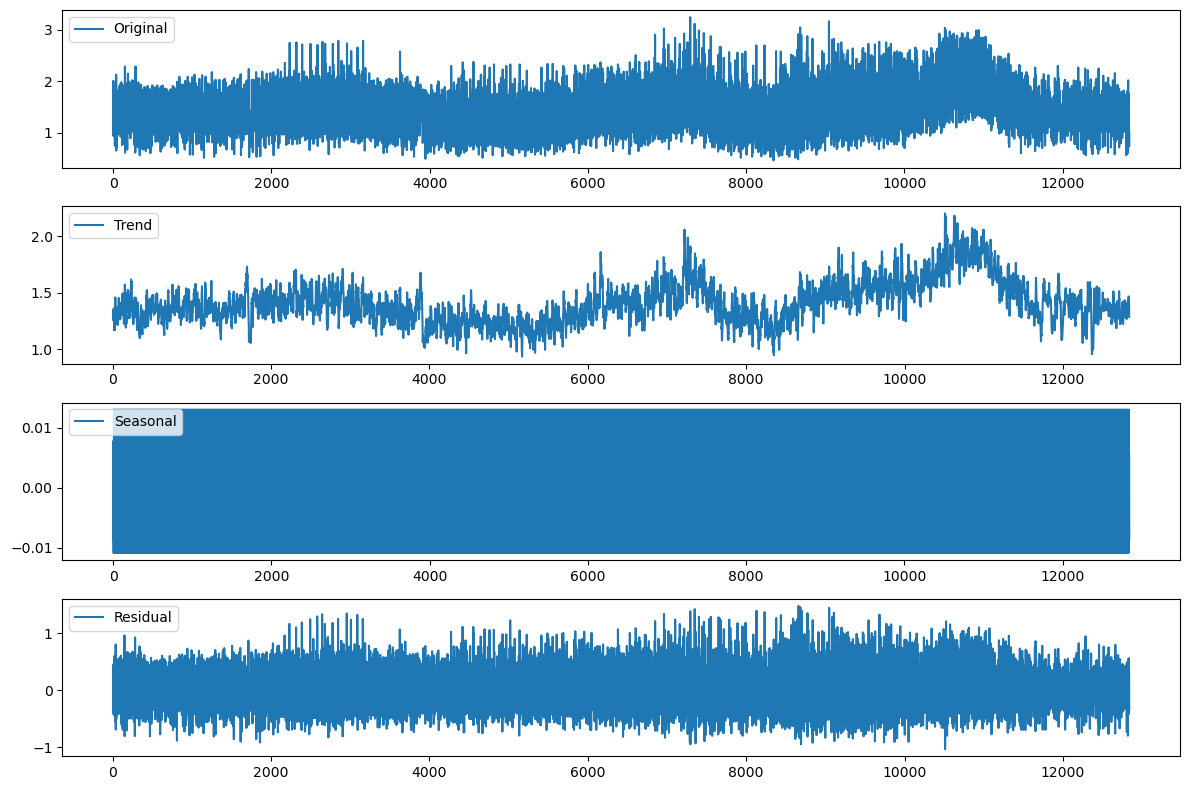

In [374]:
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df['AveragePrice'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [375]:
# 1. DES

from statsmodels.tsa.holtwinters import Holt

In [376]:
span = 10
alpha = 2 / (span + 1)
beta = 0.1
model = Holt(train_data['AveragePrice']).fit(smoothing_level=alpha, smoothing_slope=beta)

In [377]:
future_steps = len(test_data)
y_pred_des = model.forecast(future_steps).rename('DES Forecast')

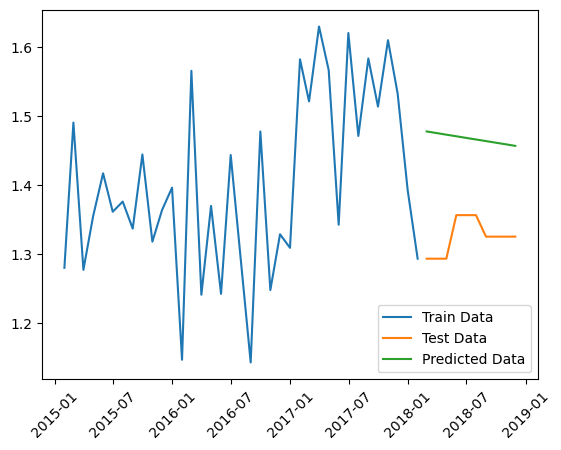

In [378]:
import matplotlib.pyplot as plt

plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.plot(y_pred_des, label='Predicted Data')

plt.xticks(rotation=45)
plt.legend()
plt.show()

In [379]:
# des ( double exponential smoothing ) does not give correct prediction because it is anable to incorporate the trends of the data . trying to apply triple exponential smoothing ( TES ) 

In [380]:
# 2. TES - additionel of trend and seasonality 

from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train_data, trend = 'add', seasonal = 'add',
                             seasonal_periods = 12).fit()

In [381]:
future_steps = len(test_data)
y_pred_tes = model.forecast(future_steps).rename('TES Forecast')

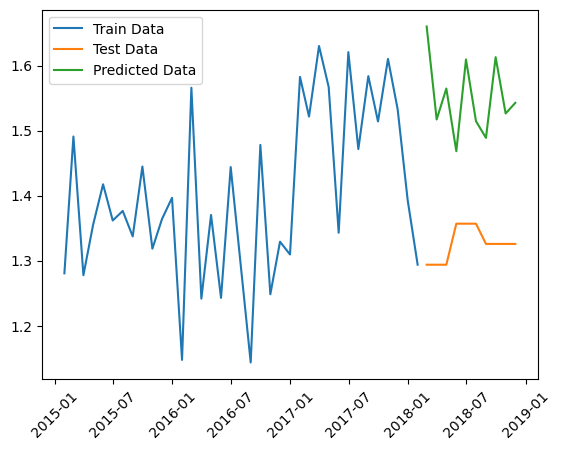

In [382]:
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.plot(y_pred_tes, label='Predicted Data')
plt.xticks(rotation=45)

plt.legend()
plt.show()

In [383]:
print(model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:             AveragePrice   No. Observations:                   37
Model:             ExponentialSmoothing   SSE                              0.376
Optimized:                         True   AIC                           -137.801
Trend:                         Additive   BIC                           -112.026
Seasonal:                      Additive   AICC                           -99.801
Seasonal Periods:                    12   Date:                 Thu, 12 Dec 2024
Box-Cox:                          False   Time:                         00:17:08
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1770785                alpha                 True
smoothing_trend          

In [384]:
from sklearn.metrics import mean_squared_error

In [385]:
# Calculate mse and rmse for TES

import numpy as np

mse_tes = mean_squared_error(test_data,y_pred_tes)
rmse_tes = np.sqrt(mean_squared_error(test_data,y_pred_tes)) #root mean sqaure error

In [386]:
mse_tes, rmse_tes

(0.055494379470161906, 0.23557245057553294)

In [387]:
# Calculate MAPE for TES

# Matching the indices of test_data and forecast

test_data_reset = test_data.reset_index(drop=True)

y_pred_tes_reset = y_pred_tes.reset_index(drop=True)

In [388]:
# Matching the data types of test_data_reset and forecast_reset

test_data_reset['y'] = test_data_reset.astype(float)

y_pred_tes_reset = y_pred_tes_reset.astype(float)

In [389]:
mape_tes = np.mean(np.abs((test_data_reset['y'] - y_pred_tes_reset) / test_data_reset['y'])) * 100

In [390]:
mape_tes

17.04299812852652

In [391]:
# mean absolute persentage error 

In [392]:
# checking for stationarity of the data , null hypothesis or alternative hypothesis 

In [393]:
# if p value is less than 0.05 then we reject the null hypothesis and conclude that data is stationary 

In [394]:
# ADF TEST  (Augmented Dickey Fuller Test) to check for stationnarity 

In [395]:
# Checking stationarity of the y data in order to apply advanced models

In [396]:
#!pip install prophet

In [397]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import prophet
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
#import neuralprophet
import logging
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns

In [398]:
def test_stationarity(monthly_df):
    dftest = adfuller(y, autolag = "AIC")
    dfoutput = pd.DataFrame(dftest[0:4], 
                            index=['Test Statistic','p-value','Lags Used','Number of Observations'])
    for key,value in dftest[4].items(): dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    print('AIC:',dftest)

In [399]:
# applying the function as difined above 
test_stationarity(y)

                                0  Critical Value (1%)  Critical Value (5%)  \
Test Statistic          -2.891631            -3.626652            -2.945951   
p-value                  0.046330            -3.626652            -2.945951   
Lags Used               10.000000            -3.626652            -2.945951   
Number of Observations  36.000000            -3.626652            -2.945951   

                        Critical Value (10%)  
Test Statistic                     -2.611671  
p-value                            -2.611671  
Lags Used                          -2.611671  
Number of Observations             -2.611671  
AIC: (-2.891630597416594, 0.046329937251660736, 10, 36, {'1%': -3.626651907578875, '5%': -2.9459512825788754, '10%': -2.6116707716049383}, -48.3635371289984)


In [400]:
# p value is = 0.046 less than 0.05 we reject the null hypothesis so the data is stationnary 

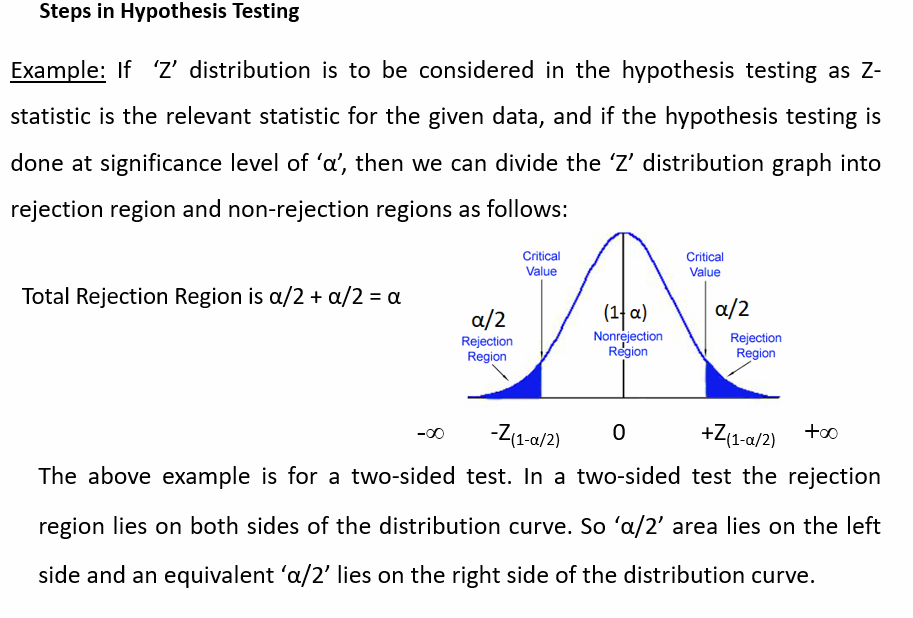

In [402]:
# applying log transformation to cross compare the P value for Adf test 

In [403]:
log = np.log(y)

In [404]:
test_stationarity(log)

                                0  Critical Value (1%)  Critical Value (5%)  \
Test Statistic          -2.891631            -3.626652            -2.945951   
p-value                  0.046330            -3.626652            -2.945951   
Lags Used               10.000000            -3.626652            -2.945951   
Number of Observations  36.000000            -3.626652            -2.945951   

                        Critical Value (10%)  
Test Statistic                     -2.611671  
p-value                            -2.611671  
Lags Used                          -2.611671  
Number of Observations             -2.611671  
AIC: (-2.891630597416594, 0.046329937251660736, 10, 36, {'1%': -3.626651907578875, '5%': -2.9459512825788754, '10%': -2.6116707716049383}, -48.3635371289984)


In [405]:
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(log)[1])

Dickey–Fuller test: p=0.043891


In [406]:
# applying exponentiel decay on logarithmic transformation 

In [407]:
exp_decay = y.ewm(halflife=10, min_periods=0, adjust=True).mean()

# ewm: Exponential Weighted Moving Average

# Halflife: Specifies the half life of the decay factor (degree of decay- the time required for the decaying quantity to fall
# to half of it's initial value). ewm will give more weight to recent observations 
# and the influence of past observations will decay exponentially with a half life of 10. 

# min_periods: Specifies minimum number of observations in a window required to have a value. Suppose min_periods=5, it means 
# from 5 the weights will be decayed and it will have more weightage for observations less than top 5 time attributes. Here
# it is set to 0, meaning that ewm will be calculated for all periods even if there are lesser than 10 observations.
# (no constraint)

# adjust=True: It adjusts the weights based on the decay factor providing a smooth ewm.

# .mean(): Calculates the mean after applying ewm.

In [408]:
# This can be useful for smoothing out fluctuations in the data and identifying the trends.

In [409]:
test_stationarity(exp_decay)

                                0  Critical Value (1%)  Critical Value (5%)  \
Test Statistic          -2.891631            -3.626652            -2.945951   
p-value                  0.046330            -3.626652            -2.945951   
Lags Used               10.000000            -3.626652            -2.945951   
Number of Observations  36.000000            -3.626652            -2.945951   

                        Critical Value (10%)  
Test Statistic                     -2.611671  
p-value                            -2.611671  
Lags Used                          -2.611671  
Number of Observations             -2.611671  
AIC: (-2.891630597416594, 0.046329937251660736, 10, 36, {'1%': -3.626651907578875, '5%': -2.9459512825788754, '10%': -2.6116707716049383}, -48.3635371289984)


In [410]:
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(exp_decay)[1])

Dickey–Fuller test: p=0.293009


In [411]:
# differencing another type of transormation 

In [412]:
# Differencing

monthly_df['AveragePrice_diff'] = monthly_df['AveragePrice'].diff()

In [413]:
monthly_df = monthly_df.dropna()

In [414]:
monthly_df

,AveragePrice,AveragePrice_diff
Date,,
2015-02-28,1.490921,0.210395
2015-03-31,1.277632,-0.213289
2015-04-30,1.355000,0.077368
2015-05-31,1.417434,0.062434
2015-06-30,1.361776,-0.055658
2015-07-31,1.376447,0.014671
2015-08-31,1.337281,-0.039167
2015-09-30,1.444737,0.107456
2015-10-31,1.318421,-0.126316


In [415]:
monthly_df.reset_index(inplace=True)

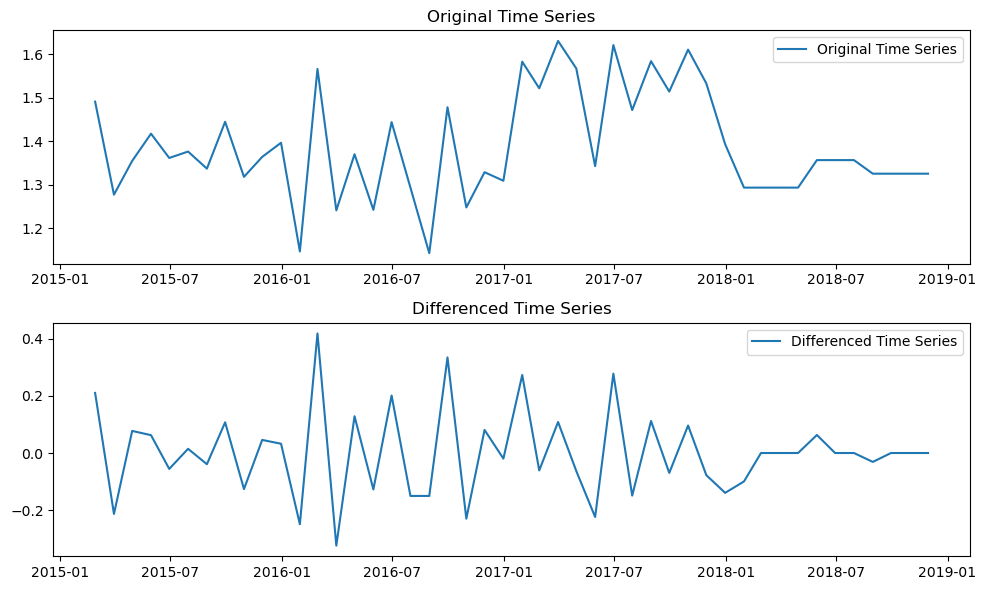

In [416]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(monthly_df['Date'], monthly_df['AveragePrice'], label='Original Time Series')
plt.title('Original Time Series')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(monthly_df['Date'], monthly_df['AveragePrice_diff'], label='Differenced Time Series')
plt.title('Differenced Time Series')
plt.legend()

plt.tight_layout()
plt.show()

In [417]:
result = adfuller(monthly_df['AveragePrice_diff'])
p_value = result[1]

In [418]:
result

(-14.990404996325111,
 1.1275476933465989e-27,
 0,
 45,
 {'1%': -3.584828853223594,
  '5%': -2.9282991495198907,
  '10%': -2.6023438271604937},
 -43.45726922786079)

In [419]:
p_value

1.1275476933465989e-27

In [420]:
# applying acf ( autocorelation function ) and pacf ( partial autocorealtion function ) in order to identify the order of the model 

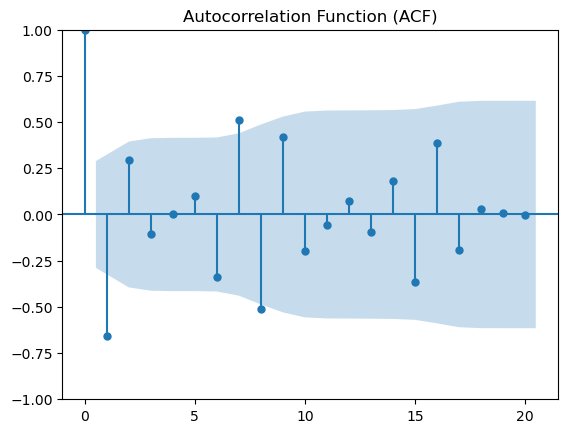

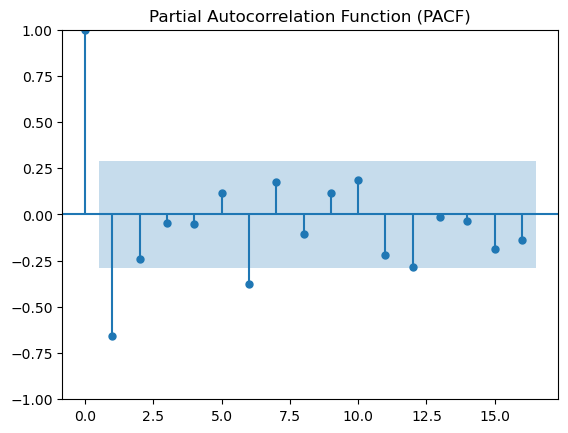

In [421]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(monthly_df['AveragePrice_diff'], lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(monthly_df['AveragePrice_diff'], lags=16)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# p=1 and q=1
# It has passed white noise test ( if p and q are within 0,1,2 then it passes white noise test) Doing hyperparameter tuning to find out optimal p and q values to pass in the model.

In [422]:
# if the spike goes inside the confidence interval then we stopp counting the order of the model from that point even if there are any other spikes outside beyond that insight spike 

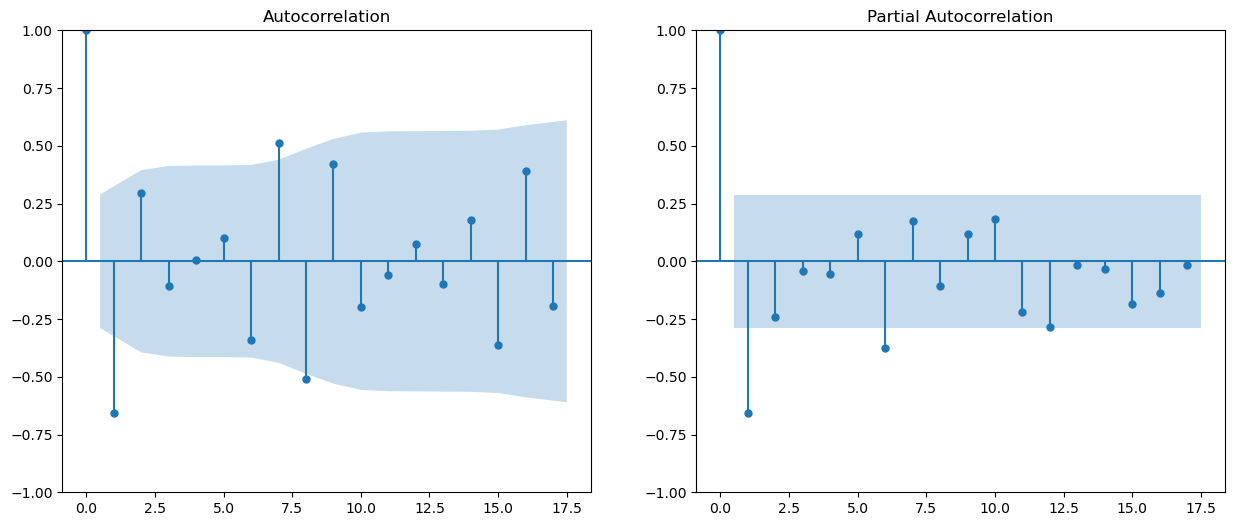

In [423]:
# OR alternate way to write ACF and PACF code:

# ACF and PACF

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15,6))

ax1 = fig.add_subplot(121) 
fig = sm.graphics.tsa.plot_acf(monthly_df['AveragePrice_diff'].values, ax=ax1)

ax2 = fig.add_subplot(122) 
fig = sm.graphics.tsa.plot_pacf(monthly_df['AveragePrice_diff'].values, ax=ax2)

# p (AR)= 1
# q (MA)= 1

In [424]:
#!pip install pmdarima

In [425]:
# Hyper parameter tuning

from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(monthly_df['AveragePrice_diff'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   
                      start_P=0,
                      start_Q=0,
                      D=1, 
                      trace=True,
                      error_action='ignore',suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=37.995, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2.310, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.33 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=6.395, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.33 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.18 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=-14.652, Time=1.01 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=inf, Time=1.33 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=0.70 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.57 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=-20.253, Time=1.51 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.48 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=inf, Time=0.88 sec
 ARIMA(2,1,0)(2,1,2)[12]             : AIC=inf, Time=0.91 sec
 ARIMA(2,1,0

In [426]:
# fiting with the best model from above hyperparameter tuning 

In [520]:
model_sarimax = sm.tsa.SARIMAX(monthly_df['AveragePrice_diff'], order=(1,1,1), seasonal_order=(2,1,0,12))

In [522]:
results = model_sarimax.fit()

In [524]:
sarimax_forecast = results.forecast(steps=len(test_data))
sarimax_forecast

46   -0.009754
47   -0.356566
48    0.426896
49   -0.343995
50    0.147616
51   -0.027472
52    0.110867
53   -0.095014
54   -0.187957
55    0.349260
Name: predicted_mean, dtype: float64

In [530]:
mse_sarimax = mean_squared_error(test_data, sarimax_forecast)
rmse_sarimax = np.sqrt(mean_squared_error(test_data, sarimax_forecast))

In [532]:
mse_sarimax

1.8184589519702683

In [534]:
rmse_sarimax

1.3485024849700011

In [538]:
# Calculate MAPE for sarimax

# Matching the indices of test_data and forecast

test_data_reset = test_data.reset_index(drop=True)

sarimax_forecast_reset = sarimax_forecast.reset_index(drop=True)

In [540]:
# Matching the data types of test_data_reset and forecast_reset

test_data_reset['y'] = test_data_reset.astype(float)

sarimax_forecast_reset = sarimax_forecast_reset.astype(float)

In [542]:
mape_sarimax = np.mean(np.abs((test_data_reset['y'] - sarimax_forecast_reset) / test_data_reset['y'])) * 100

In [544]:
mape_sarimax

99.84529202908158

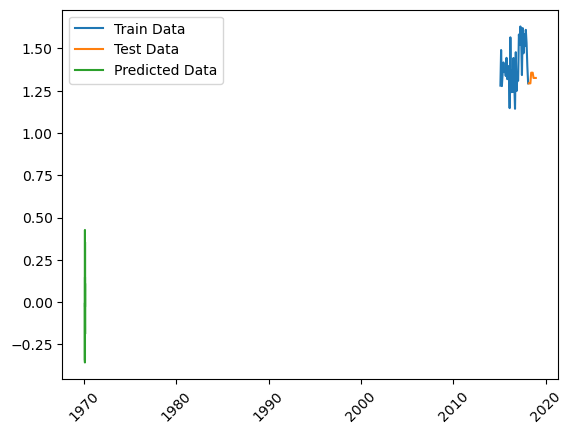

In [546]:
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.plot(sarimax_forecast, label='Predicted Data')
plt.xticks(rotation=45)

plt.legend()
plt.show()

In [548]:
# TES works better till now in comparaison to other models 

In [550]:
# applying arima model 

In [552]:
monthly_df

,Date,AveragePrice,AveragePrice_diff
0,2015-02-28,1.490921,0.210395
1,2015-03-31,1.277632,-0.213289
2,2015-04-30,1.355000,0.077368
3,2015-05-31,1.417434,0.062434
4,2015-06-30,1.361776,-0.055658
5,2015-07-31,1.376447,0.014671
6,2015-08-31,1.337281,-0.039167
7,2015-09-30,1.444737,0.107456
8,2015-10-31,1.318421,-0.126316
9,2015-11-30,1.364211,0.045789


In [554]:
# applying arima model 

In [556]:
# 4. ARIMA

# p=1 (PACF, AR), q=1 (ACF, MA), d=1

from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(monthly_df['AveragePrice_diff'],order=(1,1,1))

ARMA = model_arima.fit()
ARMA

In [558]:
arima_forecast = ARMA.forecast(steps=len(test_data))
arima_forecast

46   -0.001430
47   -0.000481
48   -0.001111
49   -0.000692
50   -0.000970
51   -0.000786
52   -0.000908
53   -0.000827
54   -0.000881
55   -0.000845
Name: predicted_mean, dtype: float64

In [562]:
mse_arima = mean_squared_error(test_data, arima_forecast)
rmse_arima = np.sqrt(mean_squared_error(test_data, arima_forecast))

In [564]:
mse_arima , rmse_arima

(1.759824800289696, 1.3265838836235333)

In [566]:
# Calculate MAPE for ARIMA

# Matching the indices of test_data and forecast

test_data_reset['y'] = test_data.reset_index(drop=True)

arima_forecast_reset = arima_forecast.reset_index(drop=True)

In [568]:
# Matching the data types of test_data_reset and forecast_reset

test_data_reset['y'] = test_data_reset['y'].astype(float)

arima_forecast_reset = arima_forecast_reset.astype(float)
mape_arima = np.mean(np.abs((test_data_reset['y'] - arima_forecast_reset) / test_data_reset['y'])) * 100

In [570]:
ARMA.summary()

# AIC and BIC of ARIMA id less than SARIMAX. TES has the best (very less than ARIMA and SARIMAX) AIC and BIC values till now.

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      AveragePrice_diff   No. Observations:                   46
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  30.882
Date:                Thu, 12 Dec 2024   AIC                            -55.764
Time:                        00:36:14   BIC                            -50.344
Sample:                             0   HQIC                           -53.743
                                 - 46                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6639      0.123     -5.395      0.000      -0.905      -0.423
ma.L1         -0.9987      6.293     -0.159      0.874     -13.332      11.335
sigma2         0.0132      0.083      0.159      0.874      -0.150       0.176
===================================================================================
Ljung-Box (L1) (Q):                   0.78   Jarque-Bera (JB):                 0.92
Prob(Q):                              0.38   Prob(JB):                         0.63
Heteroskedasticity (H):               0.47   Skew:                             0.00
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [572]:
# 5. ARMA

# p=1 (PACF, AR), q=1 (ACF, MA), d=0

from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(monthly_df['AveragePrice_diff'],order=(1,0,1))

ARMA = model_arima.fit()
ARMA

In [574]:
arma_forecast = ARMA.forecast(steps=len(test_data))
arma_forecast

46   -0.000900
47   -0.000810
48   -0.000854
49   -0.000832
50   -0.000843
51   -0.000838
52   -0.000840
53   -0.000839
54   -0.000839
55   -0.000839
Name: predicted_mean, dtype: float64

In [576]:
mse_arma = mean_squared_error(test_data, arma_forecast)
rmse_arma = np.sqrt(mean_squared_error(test_data, arma_forecast))

In [578]:
mse_arma , rmse_arma

(1.759696206222283, 1.3265354146129242)

In [580]:
# Calculate MAPE for ARMA

# Matching the indices of test_data and forecast

test_data_reset['y'] = test_data.reset_index(drop=True)

arma_forecast_reset = arma_forecast.reset_index(drop=True)

In [582]:
# Matching the data types of test_data_reset and forecast_reset

test_data_reset['y'] = test_data_reset['y'].astype(float)

arma_forecast_reset = arma_forecast_reset.astype(float)
mape_arma = np.mean(np.abs((test_data_reset['y'] - arma_forecast_reset) / test_data_reset['y'])) * 100

In [584]:
ARMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      AveragePrice_diff   No. Observations:                   46
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  35.884
Date:                Thu, 12 Dec 2024   AIC                            -63.768
Time:                        00:44:38   BIC                            -56.453
Sample:                             0   HQIC                           -61.028
                                 - 46                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.009     -0.098      0.922      -0.018       0.016
ar.L1         -0.4878      0.262     -1.860      0.063      -1.002       0.026
ma.L1         -0.3495      0.219     -1.595      0.111      -0.779       0.080
sigma2         0.0121      0.002      5.101      0.000       0.007       0.017
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.48
Prob(Q):                              0.99   Prob(JB):                         0.79
Heteroskedasticity (H):               0.76   Skew:                            -0.13
Prob(H) (two-sided):                  0.61   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [586]:
monthly_df

,Date,AveragePrice,AveragePrice_diff
0,2015-02-28,1.490921,0.210395
1,2015-03-31,1.277632,-0.213289
2,2015-04-30,1.355000,0.077368
3,2015-05-31,1.417434,0.062434
4,2015-06-30,1.361776,-0.055658
5,2015-07-31,1.376447,0.014671
6,2015-08-31,1.337281,-0.039167
7,2015-09-30,1.444737,0.107456
8,2015-10-31,1.318421,-0.126316
9,2015-11-30,1.364211,0.045789


In [588]:
# APPLYING FB Prophet 
# Dropping 'AveragePrice' since FB Prophet needs only ds and y columns. And keeping column 'AveragePrice_diff', since it is
# making the data stationary.

monthly_df = monthly_df.drop(['AveragePrice'], axis=1)

In [590]:
monthly_df

,Date,AveragePrice_diff
0,2015-02-28,0.210395
1,2015-03-31,-0.213289
2,2015-04-30,0.077368
3,2015-05-31,0.062434
4,2015-06-30,-0.055658
5,2015-07-31,0.014671
6,2015-08-31,-0.039167
7,2015-09-30,0.107456
8,2015-10-31,-0.126316
9,2015-11-30,0.045789


In [592]:
monthly_df.rename(columns={'Date': 'ds', 'AveragePrice_diff': 'y'}, inplace=True)

In [594]:
monthly_df

,ds,y
0,2015-02-28,0.210395
1,2015-03-31,-0.213289
2,2015-04-30,0.077368
3,2015-05-31,0.062434
4,2015-06-30,-0.055658
5,2015-07-31,0.014671
6,2015-08-31,-0.039167
7,2015-09-30,0.107456
8,2015-10-31,-0.126316
9,2015-11-30,0.045789


In [596]:
# Create and fit the Prophet model

model_fb = Prophet()
model_fb.fit(monthly_df)

# Here we are considering the whole data, and not doing train test split. But for training the model, we need to split the 
# data into train and test.

00:50:51 - cmdstanpy - INFO - Chain [1] start processing
00:50:51 - cmdstanpy - INFO - Chain [1] done processing


In [598]:
# Perform train-test split
  
train_size = int(len(monthly_df) * 0.8)

train_data = monthly_df[:train_size]
test_data = monthly_df[train_size:]

# model.fit(train_data[['ds', 'y']]

In [600]:
train_data.shape, test_data.shape

((36, 2), (10, 2))

In [602]:
model_fb1 = Prophet()

In [604]:
# Fit the model with train test split

model_fb1.fit(train_data[['ds', 'y']])

00:52:11 - cmdstanpy - INFO - Chain [1] start processing
00:52:12 - cmdstanpy - INFO - Chain [1] done processing


In [606]:
future_dates = len(test_data)

future_dates1 = model_fb1.make_future_dataframe(future_dates)

forecast = model_fb1.predict(future_dates1)

In [608]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-02-28,-0.004797,0.060075,0.362607,-0.004797,-0.004797,0.208348,0.208348,0.208348,0.208348,0.208348,0.208348,0.0,0.0,0.0,0.203550
1,2015-03-31,-0.005245,-0.236099,0.057563,-0.005245,-0.005245,-0.074416,-0.074416,-0.074416,-0.074416,-0.074416,-0.074416,0.0,0.0,0.0,-0.079660
2,2015-04-30,-0.005677,-0.088883,0.213667,-0.005677,-0.005677,0.065854,0.065854,0.065854,0.065854,0.065854,0.065854,0.0,0.0,0.0,0.060177
3,2015-05-31,-0.006125,-0.129656,0.176811,-0.006125,-0.006125,0.029547,0.029547,0.029547,0.029547,0.029547,0.029547,0.0,0.0,0.0,0.023423
4,2015-06-30,-0.006558,-0.188474,0.116692,-0.006558,-0.006558,-0.027992,-0.027992,-0.027992,-0.027992,-0.027992,-0.027992,0.0,0.0,0.0,-0.034550
5,2015-07-31,-0.007005,-0.174914,0.135298,-0.007005,-0.007005,-0.012104,-0.012104,-0.012104,-0.012104,-0.012104,-0.012104,0.0,0.0,0.0,-0.019109
6,2015-08-31,-0.007453,-0.160532,0.157601,-0.007453,-0.007453,0.002098,0.002098,0.002098,0.002098,0.002098,0.002098,0.0,0.0,0.0,-0.005355
7,2015-09-30,-0.007885,-0.103111,0.201813,-0.007885,-0.007885,0.051614,0.051614,0.051614,0.051614,0.051614,0.051614,0.0,0.0,0.0,0.043728
8,2015-10-31,-0.008333,-0.192169,0.117108,-0.008333,-0.008333,-0.026703,-0.026703,-0.026703,-0.026703,-0.026703,-0.026703,0.0,0.0,0.0,-0.035036
9,2015-11-30,-0.008766,-0.077609,0.222121,-0.008766,-0.008766,0.073966,0.073966,0.073966,0.073966,0.073966,0.073966,0.0,0.0,0.0,0.065200


In [610]:
# we are generating the future dates using the same legnth as the length of the test data here . 
# here we are generating the data frame counting the future dates for which the predection are to be made 
# the period parameters classified the number futur of the periods in days for which the prediction will be generated 

In [612]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
41,2018-02-06,2.036474,1.874069,2.180683
42,2018-02-07,2.228553,2.073832,2.370984
43,2018-02-08,2.372041,2.220673,2.529561
44,2018-02-09,2.466819,2.307188,2.602615
45,2018-02-10,2.513855,2.369072,2.666771


In [614]:
# yhat is the predicted value , yhat_lower & yhat upper are the range predicted values 

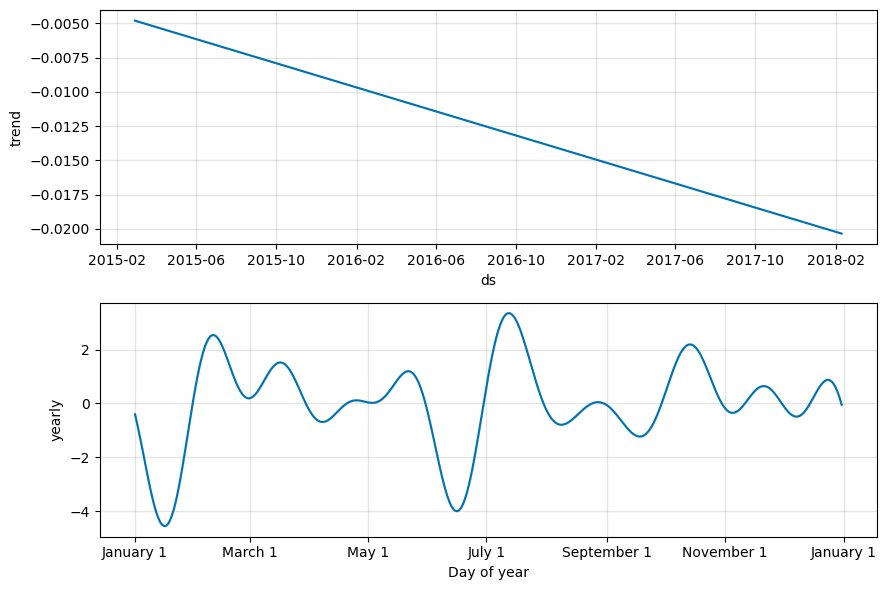

In [616]:
model_fb1.plot_components(forecast)
plt.show()

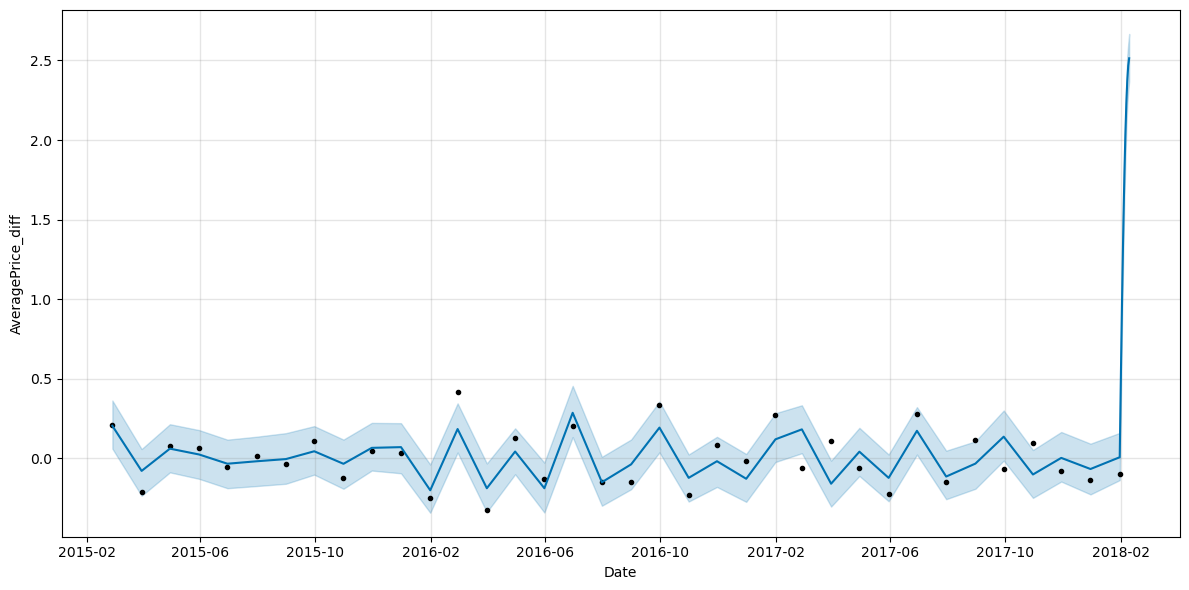

In [618]:
model_fb1.plot(forecast, xlabel='Date', ylabel='AveragePrice_diff', figsize=(12, 6))
plt.show()

# This line plots the actual(by default it should be test data set) and predicted values using the 'plot' method provided by 
# the prophet model. 
# The forecast data frame is passed as an argument and gives the forecasted band within the plot.



# The black dots represent the actual data points from the original data set. Each dot corresponds to an actual observation 
# in the time series.

# The Light blue shaded region represents the uncertainty interval for the predicted values.

In [620]:
# Prophet provides an uncertainty interval which helps to capture the uncertainty and potential variablity in the 
# forecasted values. The light blue band typically represents a confidence interval around the predicted trend.

# The Deep blue trend represents the precticted trend of the time series data based on facebook prophet model.
# This trend represents the overall pattern or direction of the data over time. The trend is fitted to the historical data
# and extended into the future to make predictions.

In [622]:
# Calculate MAPE for FB Prophet

# Matching the indices of test_data and forecast

test_data_reset = test_data.reset_index(drop=True)

forecast_reset = forecast['yhat'].reset_index(drop=True)

In [624]:
# Matching the data types of test_data_reset and forecast_reset

test_data_reset['y'] = test_data_reset['y'].astype(float)

forecast_reset = forecast['yhat'].astype(float)

In [626]:
import numpy as np
mape_fbprophet = np.mean(np.abs((test_data_reset['y'] - forecast_reset) / test_data_reset['y'])) * 100

In [628]:
# Calculate mse and rmse for FB Prophet

se = np.square(forecast.loc[:, 'yhat'] - monthly_df['y'])

In [630]:
mse_fb = np.mean(se)
rmse_fb = np.sqrt(mse_fb)

In [632]:
mse_fb ,rmse_fb

(0.7693961729838952, 0.877152308885917)

In [634]:
# TES is the best model with respect of minimum errors 